Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn as ib
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import dropout
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df = df.drop(['id'],axis=1)
X=df.iloc[:, :-1].values
y=df.iloc[:,-1].values
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
print(X)

[['Male' 67.0 0 ... 228.69 36.6 'formerly smoked']
 ['Female' 61.0 0 ... 202.21 nan 'never smoked']
 ['Male' 80.0 0 ... 105.92 32.5 'never smoked']
 ...
 ['Female' 35.0 0 ... 82.99 30.6 'never smoked']
 ['Male' 51.0 0 ... 166.29 25.6 'formerly smoked']
 ['Female' 44.0 0 ... 85.28 26.2 'Unknown']]


In [ ]:
print(y)

[1 1 1 ... 0 0 0]


gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


<Axes: >

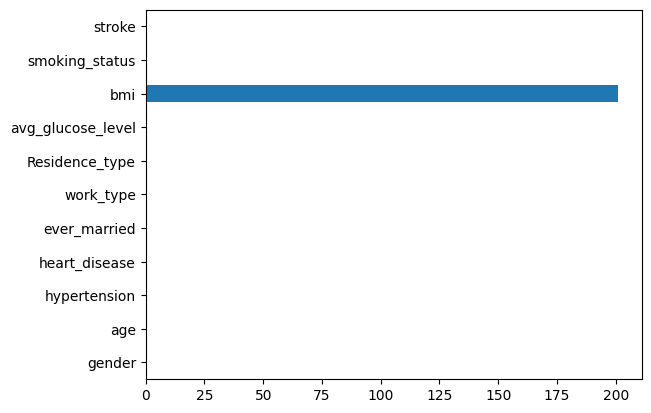

In [ ]:
print(df.isna().sum())
df.isna().sum().plot.barh()

In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**Gender** **Analysis**

In [ ]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

We have a single instance of 'other' gender so we will remove it as to reduce the dimension of age because
as we know fewer features means less complexity

<Axes: ylabel='count'>

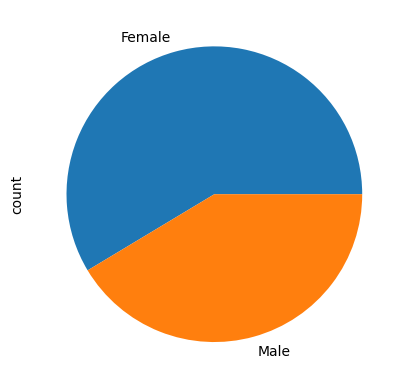

In [ ]:
df['gender'] = df['gender'].replace('Other','Female')
df['gender'].value_counts().plot(kind="pie")


**Stroke Analysis** which is our dependent variable

In [ ]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

<Axes: xlabel='stroke'>

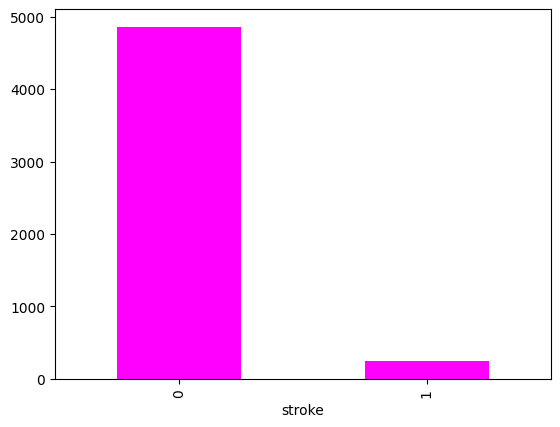

In [ ]:
df['stroke'].value_counts().plot(kind="bar",color = "magenta")

HyperTension Analysis

<Axes: xlabel='hypertension'>

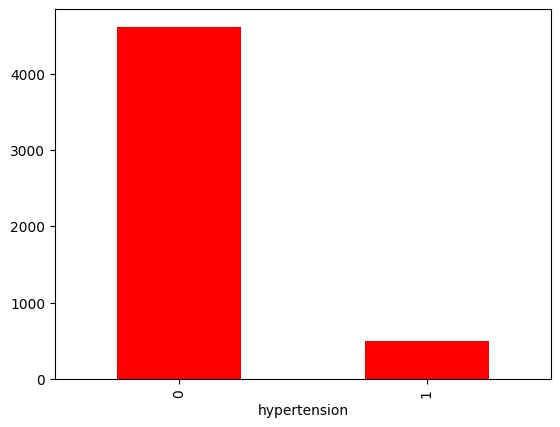

In [ ]:
df['hypertension'].value_counts().plot(kind="bar",color = "red")

Work Type Analysis

In [ ]:
df['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

<Axes: ylabel='count'>

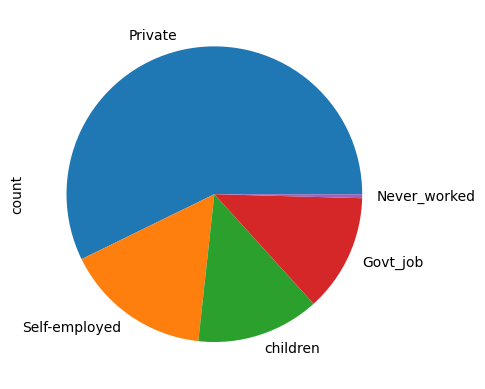

In [ ]:
df['work_type'].value_counts().plot(kind="pie")

Smoking Status Analysis

In [ ]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

<Axes: ylabel='count'>

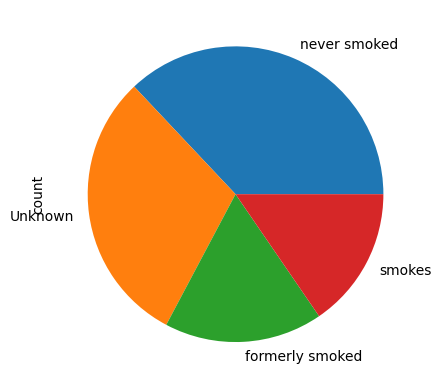

In [ ]:
df['smoking_status'].value_counts().plot(kind="pie")

Residence type Analysis

In [ ]:
df['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

<Axes: ylabel='count'>

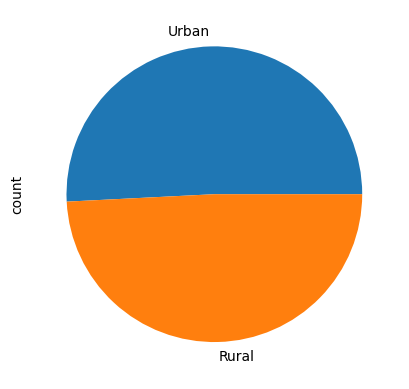

In [ ]:
df['Residence_type'].value_counts().plot(kind="pie")

BMI Analysis

In [ ]:
df['bmi'].isnull().sum()

201

<Axes: xlabel='bmi', ylabel='Count'>

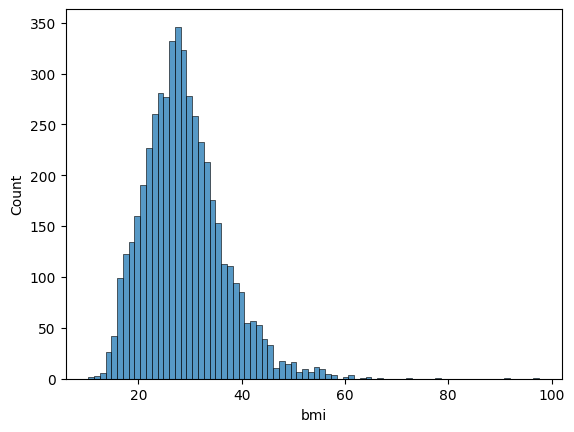

In [ ]:
sns.histplot(data=df['bmi'])

As the BMI is rightly skewed

<Axes: ylabel='bmi'>

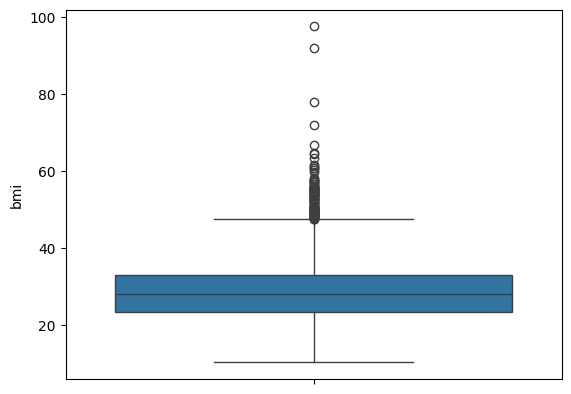

In [ ]:
sns.boxplot(data=df['bmi'])

Based on the histogram and boxplot we see that there are many outliers in bmi

In [ ]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
# Finding IQR
IQR = Q3 - Q1
da=(df['bmi'] < (Q1 - 1.5 * IQR)) | (df['bmi'] > (Q3 + 1.5 * IQR))
da.value_counts()

bmi
False    5000
True      110
Name: count, dtype: int64

In [ ]:
df_na=df.loc[df['bmi'].isnull()]
g=df_na['stroke'].sum()
print("People who got stroke and their BMI is NA:",g)
h=df['stroke'].sum()
print("People who got stroke and their BMI is given:",h)
print("percentage of people with stroke in Nan values to the overall dataset:",g/h*100)


People who got stroke and their BMI is NA: 40
People who got stroke and their BMI is given: 249
percentage of people with stroke in Nan values to the overall dataset: 16.06425702811245


* Since there are outliers present we can’t perform mean imputation as mean is affected by the outliers
* Hence we impute it with median values

In [ ]:
print("median of bmi",df['bmi'].median())
df['bmi']=df['bmi'].fillna(df['bmi'].median())

median of bmi 28.1


In [ ]:
print(X)

[['Male' 67.0 0 ... 228.69 36.6 'formerly smoked']
 ['Female' 61.0 0 ... 202.21 nan 'never smoked']
 ['Male' 80.0 0 ... 105.92 32.5 'never smoked']
 ...
 ['Female' 35.0 0 ... 82.99 30.6 'never smoked']
 ['Male' 51.0 0 ... 166.29 25.6 'formerly smoked']
 ['Female' 44.0 0 ... 85.28 26.2 'Unknown']]


In [ ]:
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(missing_values=np.nan, strategy='median')
#imputer.fit(X[:, 8:9])
#X[:, 8:9] = imputer.transform(X[:, 8:9])

In [ ]:
#print(x)

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


<Axes: >

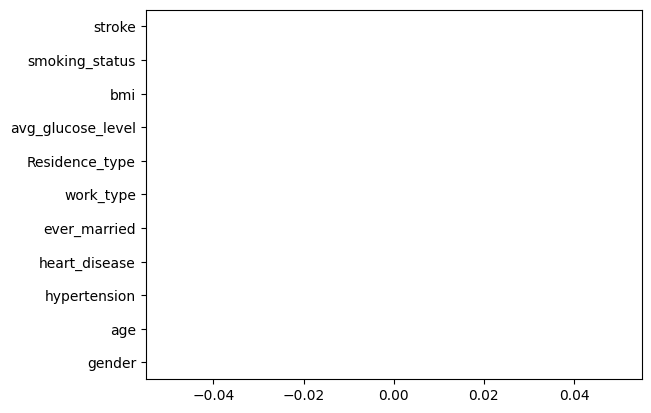

In [ ]:
print(df.isna().sum())
df.isna().sum().plot.barh()

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


AGE Analysis

<Axes: xlabel='age', ylabel='Count'>

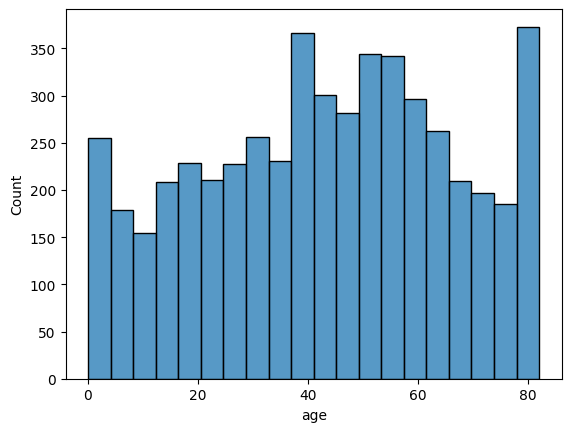

In [ ]:
sns.histplot(data=df['age'])

<Axes: ylabel='age'>

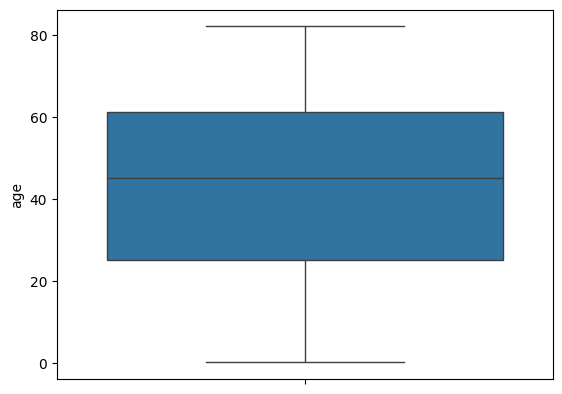

In [ ]:
sns.boxplot(data=df['age'])

AVERAGE GLUCOSE LEVEL ANALYSIS

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

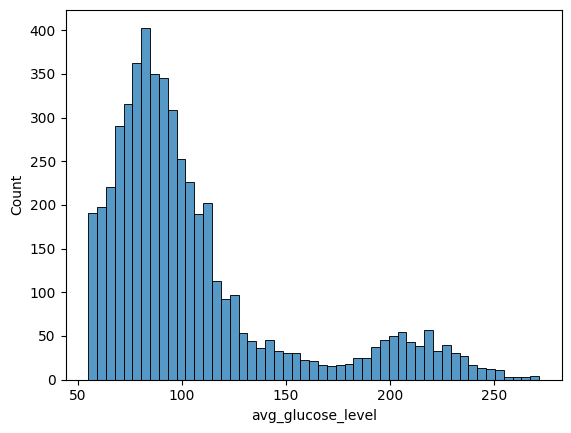

In [ ]:
sns.histplot(data=df['avg_glucose_level'])

<Axes: ylabel='avg_glucose_level'>

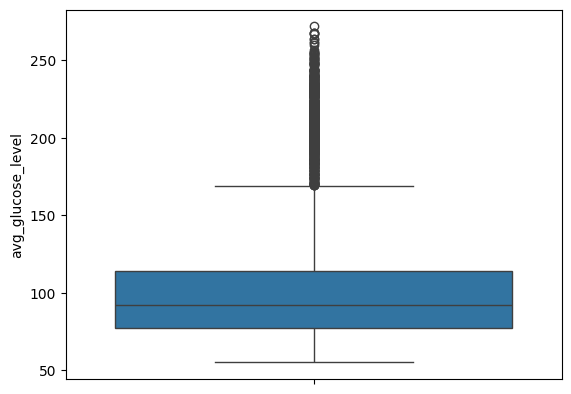

In [ ]:
sns.boxplot(data=df['avg_glucose_level'])

There are many outliers present based on the boxplot and histogram

In [ ]:
Q1 = df['avg_glucose_level'].quantile(0.25)
Q3 = df['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
da=(df['avg_glucose_level'] < (Q1 - 1.5 * IQR)) | (df['avg_glucose_level'] > (Q3 + 1.5 * IQR))
da.value_counts()

avg_glucose_level
False    4483
True      627
Name: count, dtype: int64

Heart Disease Analysis

In [ ]:
df['heart_disease'].value_counts()

heart_disease
0    4834
1     276
Name: count, dtype: int64

<Axes: ylabel='count'>

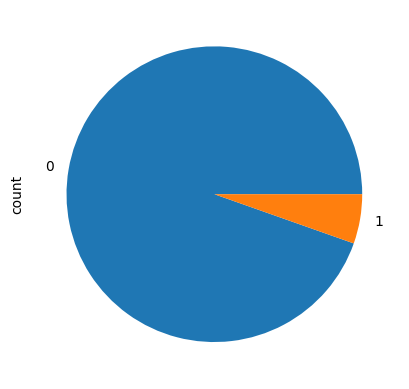

In [ ]:
df['heart_disease'].value_counts().plot(kind="pie")

Ever_married analysis with values

In [ ]:
df['ever_married'].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

<Axes: ylabel='count'>

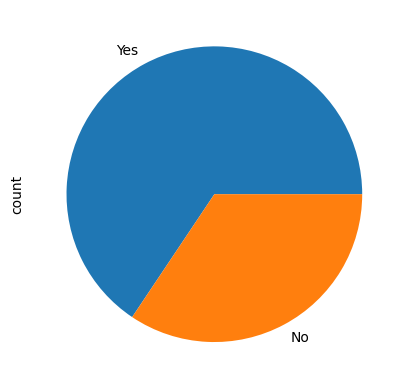

In [ ]:
df['ever_married'].value_counts().plot(kind="pie")

## Cross analysis - all the attribute compared with target attibute

<Axes: xlabel='stroke', ylabel='count'>

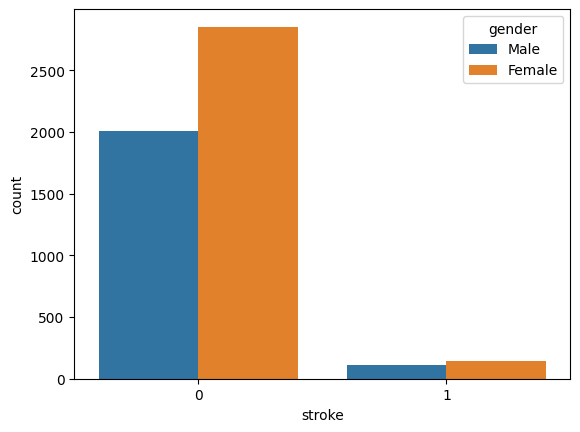

In [ ]:
sns.countplot(x='stroke', hue='gender', data=df)

<Axes: xlabel='stroke', ylabel='count'>

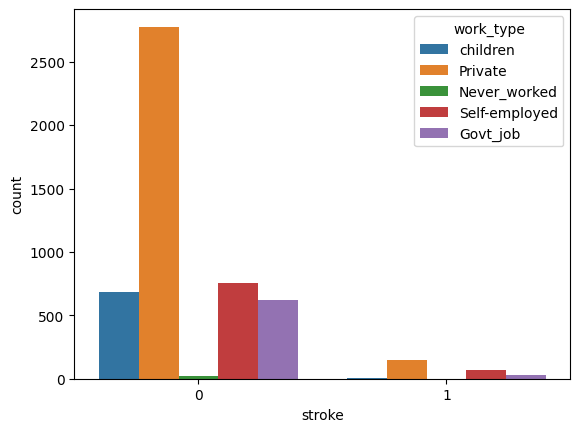

In [ ]:
sns.countplot(x='stroke', hue='work_type', data=df)

<Axes: xlabel='stroke', ylabel='count'>

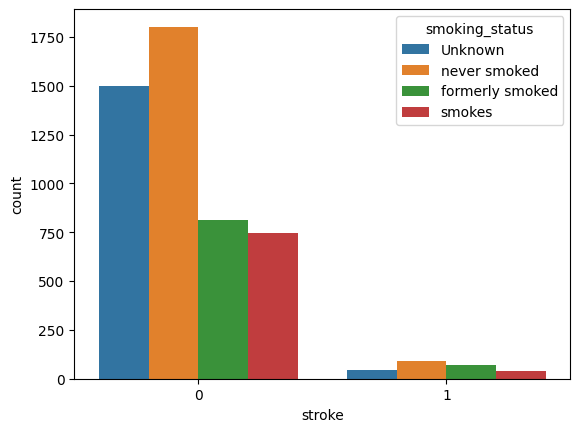

In [ ]:
sns.countplot(x='stroke', hue='smoking_status', data=df)

<Axes: xlabel='stroke', ylabel='count'>

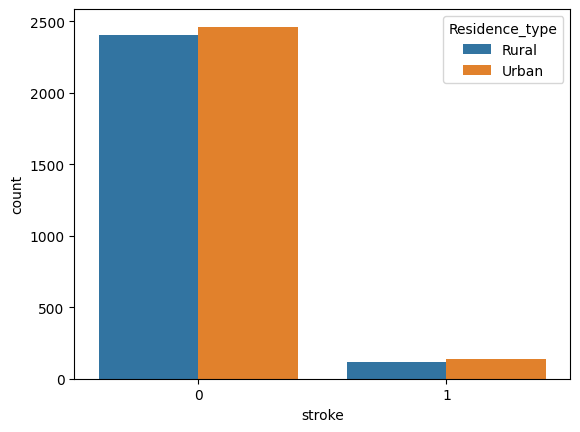

In [ ]:
sns.countplot(x='stroke', hue='Residence_type', data=df)

<Axes: xlabel='stroke', ylabel='count'>

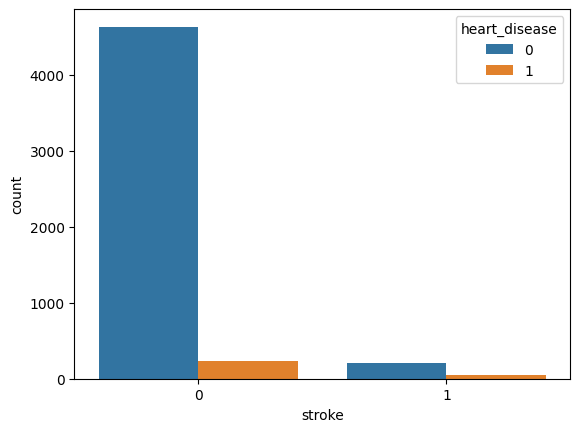

In [ ]:
sns.countplot(x='stroke', hue='heart_disease', data=df)

<Axes: xlabel='stroke', ylabel='count'>

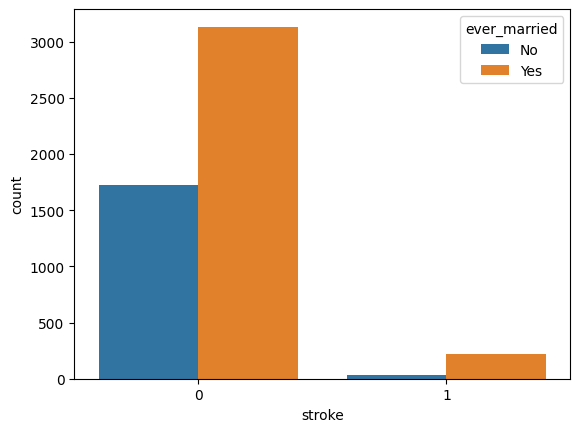

In [ ]:
sns.countplot(x='stroke', hue='ever_married', data=df)

### Creating dummy variables for numeric-binary attributes

In [ ]:
df[['hypertension', 'heart_disease', 'stroke']] = df[['hypertension', 'heart_disease', 'stroke']].astype(str)
df = pd.get_dummies(df, drop_first= True)

In [ ]:
df.head()

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,67.0,228.69,36.6,True,False,True,True,False,True,False,False,True,True,False,False,True
1,61.0,202.21,28.1,False,False,False,True,False,False,True,False,False,False,True,False,True
2,80.0,105.92,32.5,True,False,True,True,False,True,False,False,False,False,True,False,True
3,49.0,171.23,34.4,False,False,False,True,False,True,False,False,True,False,False,True,True
4,79.0,174.12,24.0,False,True,False,True,False,False,True,False,False,False,True,False,True


In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X=df.drop(['stroke_1'],axis=1)
y=df['stroke_1']
X_over, y_over = oversample.fit_resample(X, y)

In [ ]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
df[['bmi', 'avg_glucose_level', 'age']] = s.fit_transform(df[['bmi', 'avg_glucose_level', 'age']])

test-train-split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size= 0.20, random_state= 42)

In [ ]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (7777, 15)
y_train: (7777,)
X_test: (1945, 15)
y_test: (1945,)


Training Model

decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score
clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Generate and print the classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

Accuracy: 0.9722365038560411
              precision    recall  f1-score   support

       False       1.00      0.94      0.97       975
        True       0.95      1.00      0.97       970

    accuracy                           0.97      1945
   macro avg       0.97      0.97      0.97      1945
weighted avg       0.97      0.97      0.97      1945



KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,precision_score,recall_score,f1_score
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]
confusion_matrix(y_test, y_pred_knn)
print('Accuracy:',accuracy_score(y_test, y_pred_knn)*100)
# Generate and print the classification report
classification_rep = classification_report(y_test, y_pred_knn)
print(classification_rep)

Accuracy: 97.22365038560412
              precision    recall  f1-score   support

       False       1.00      0.94      0.97       975
        True       0.95      1.00      0.97       970

    accuracy                           0.97      1945
   macro avg       0.97      0.97      0.97      1945
weighted avg       0.97      0.97      0.97      1945



Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf_clf = RandomForestClassifier(n_estimators = 100,random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred_rf)*100)
# Generate and print the classification report
classification_rep = classification_report(y_test, y_pred_rf)
print(classification_rep)

Accuracy: 99.33161953727506
              precision    recall  f1-score   support

       False       1.00      0.99      0.99       975
        True       0.99      1.00      0.99       970

    accuracy                           0.99      1945
   macro avg       0.99      0.99      0.99      1945
weighted avg       0.99      0.99      0.99      1945



In [ ]:
from sklearn import model_selection
from sklearn.model_selection import KFold
kfold_kridge = model_selection.KFold(n_splits=20, shuffle=True)
results_kfold = model_selection.cross_val_score(rf_clf, X, y, cv=kfold_kridge)
print("Accuracy: ", results_kfold.mean()*100)
print(results_kfold)

Accuracy:  94.97020526960786
[0.94140625 0.94140625 0.94921875 0.95703125 0.94140625 0.953125
 0.9453125  0.96484375 0.96875    0.95703125 0.95294118 0.94901961
 0.95686275 0.94509804 0.94901961 0.96862745 0.93333333 0.94509804
 0.92156863 0.95294118]


Logistic Regression

In [ ]:

from sklearn.linear_model import LogisticRegression


# Train the logistic regression model
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions
y_pred_lr = classifier.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred_lr)*100)

# Generate and print the classification report
classification_rep = classification_report(y_test, y_pred_lr)
print(classification_rep)


Accuracy: 76.60668380462725
              precision    recall  f1-score   support

       False       0.79      0.72      0.76       975
        True       0.74      0.81      0.78       970

    accuracy                           0.77      1945
   macro avg       0.77      0.77      0.77      1945
weighted avg       0.77      0.77      0.77      1945



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Deep Learning Model

In [ ]:
# Normalize the features
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [ ]:
# Build the neural network model
deep_model = Sequential()
deep_model.add(Dense(400,activation='relu', input_shape=(X_train_norm.shape[1],)))
deep_model.add(Dropout(0.5))
deep_model.add(Dense(400,activation='relu'))
deep_model.add(Dropout(0.5))
deep_model.add(Dense(128,activation='relu'))
deep_model.add(Dense(1,activation='sigmoid'))

In [ ]:
# Compile the model
deep_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

In [ ]:
deep_model.fit(X_train_norm, y_train, epochs=200, batch_size=32, verbose=1)

Epoch 1/200
244/244 [==============================] - 3s 6ms/step - loss: 0.5017 - accuracy: 0.7612
Epoch 2/200
244/244 [==============================] - 1s 6ms/step - loss: 0.4548 - accuracy: 0.7913
Epoch 3/200
244/244 [==============================] - 1s 6ms/step - loss: 0.4351 - accuracy: 0.7945
Epoch 4/200
244/244 [==============================] - 2s 6ms/step - loss: 0.4205 - accuracy: 0.8042
Epoch 5/200
244/244 [==============================] - 2s 6ms/step - loss: 0.4025 - accuracy: 0.8121
Epoch 6/200
244/244 [==============================] - 2s 6ms/step - loss: 0.3950 - accuracy: 0.8190
Epoch 7/200
244/244 [==============================] - 2s 8ms/step - loss: 0.3771 - accuracy: 0.8280
Epoch 8/200
244/244 [==============================] - 2s 9ms/step - loss: 0.3655 - accuracy: 0.8371
Epoch 9/200
244/244 [==============================] - 1s 6ms/step - loss: 0.3634 - accuracy: 0.8348
Epoch 10/200
244/244 [==============================] - 1s 6ms/step - loss: 0.3459 - accura

In [ ]:
# Predict using test dataset
y_pred_deep = deep_model.predict(X_test_norm)
y_pred_deep = (y_pred_deep > 0.5).astype(int)

61/61 [==============================] - 0s 2ms/step


Model Evaluation

In [ ]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_deep)
print("Accuracy:", accuracy*100)
classification_rep = classification_report(y_test, y_pred_deep)
print(classification_rep)

Accuracy: 96.34961439588689
              precision    recall  f1-score   support

       False       1.00      0.93      0.96       975
        True       0.93      1.00      0.96       970

    accuracy                           0.96      1945
   macro avg       0.97      0.96      0.96      1945
weighted avg       0.97      0.96      0.96      1945



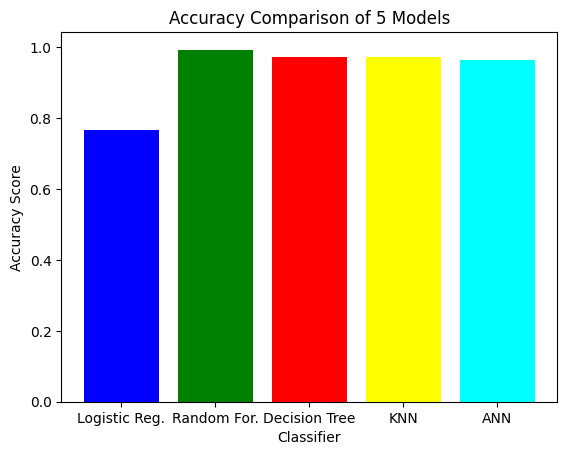

In [ ]:
import matplotlib.pyplot as plt
accuracy_scores = [accuracy_score(y_pred_lr, y_test), accuracy_score(y_pred_rf, y_test), accuracy_score(y_pred , y_test),accuracy_score(y_pred_knn, y_test),accuracy_score(y_test, y_pred_deep)]
plt.bar(['Logistic Reg.', 'Random For.', 'Decision Tree','KNN','ANN'], accuracy_scores, color=['blue', 'green', 'red','yellow','cyan'])
plt.title('Accuracy Comparison of 5 Models')
plt.xlabel('Classifier')
plt.ylabel('Accuracy Score')
plt.show()

In [ ]:
X_train.shape

(7777, 15)